In [ ]:
# 생성 해야할 파일 리스트

* WORDMAP_coco_5_cap_per_img_5_min_word_freq.json

TRAIN_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json

VAL_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
VAL_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
VAL_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json

TEST_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
TEST_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
TEST_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json

train36.hdf5
val36.hdf5

In [136]:
with open("./final_dataset/TRAIN_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json", 'r') as f:
    TRAIN_CAPLENS_coco_5_cap_per_img_5_min_word_freq=json.load(f)

In [138]:
with open("./final_dataset/VAL_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json", 'r') as f:
    VAL_CAPTIONS_coco_5_cap_per_img_5_min_word_freq=json.load(f)

In [140]:
with open("./final_dataset/VAL_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json", 'r') as f:
    VAL_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq=json.load(f)

In [141]:
VAL_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq

[['v', 35372],
 ['v', 32358],
 ['v', 33057],
 ['v', 31720],
 ['v', 35023],
 ['v', 35427],
 ['v', 33624],
 ['v', 31711],
 ['v', 34539],
 ['v', 33778],
 ['v', 32028],
 ['v', 33605],
 ['v', 32567],
 ['v', 30715],
 ['v', 33797],
 ['v', 30952],
 ['v', 34422],
 ['v', 33733],
 ['v', 33438],
 ['v', 33950],
 ['v', 31458],
 ['v', 35228],
 ['v', 32597],
 ['v', 31828],
 ['v', 33368],
 ['v', 31759],
 ['v', 31710],
 ['v', 32085],
 ['v', 31614],
 ['v', 34281],
 ['v', 33439],
 ['v', 34952],
 ['v', 33526],
 ['v', 33335],
 ['v', 31299],
 ['v', 33157],
 ['v', 33519],
 ['v', 30820],
 ['v', 31049],
 ['v', 33361],
 ['v', 32900],
 ['v', 31905],
 ['v', 32415],
 ['v', 32553],
 ['v', 32676],
 ['v', 34727],
 ['v', 35001],
 ['v', 34275],
 ['v', 32356],
 ['v', 32909],
 ['v', 32931],
 ['v', 33158],
 ['v', 32963],
 ['v', 32895],
 ['v', 35212],
 ['v', 32099],
 ['v', 34065],
 ['v', 32062],
 ['v', 30771],
 ['v', 34234],
 ['v', 33067],
 ['v', 33648],
 ['v', 31028],
 ['v', 31685],
 ['v', 33672],
 ['v', 35166],
 ['v', 314

In [1]:
from glob import glob
import json
import h5py
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '4'

In [3]:
import sys
sys.path.append(os.path.join(os.getcwd(), "vizwiz-caption"))

In [4]:
split = 'TRAIN'
data_folder = 'final_dataset'
data_name = 'coco_5_cap_per_img_5_min_word_freq'

# tokenizer 준비
* https://github.com/HwangJohn/vizwiz-caption


In [5]:
%matplotlib inline
from vizwiz_api.vizwiz import VizWiz
from vizwiz_eval_cap.eval import VizWizEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import pylab
#pylab.rcParams['figure.figsize'] = (8.0, 10.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [146]:
!chmod 755 vizwiz-captions/get_stanford_models.sh

chmod: cannot access 'vizwiz-captions/get_stanford_models.sh': No such file or directory


In [147]:
!vizwiz-caption/get_stanford_models.sh

Found Stanford CoreNLP.


In [148]:
annTrainFile = '../mypythia/data/vizwiz/annotations/train.json'
annValFile    = '../mypythia/data/vizwiz/annotations/val.json'

vizwizTrain = VizWiz(annTrainFile, ignore_rejected=True, ignore_precanned=True)
vizwizVal = VizWiz(annValFile, ignore_rejected=True, ignore_precanned=True)

A control panel for a treadmill exercise machine.
A black workout machine with a grey interface and grey buttons
-This is the screen of a piece of exercise equipment
-The number on the screen says 4,19
-There are gray buttons to change the incline, speed and to start and stop the machine
A medical device of sorts with digital displays is sitting here.
A metal bar with a silver control panel with a timer


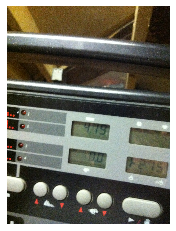

In [166]:
# fig = plt.figure(figsize=(20,20))
# get all images, select one at random
imgIds = vizwizTrain.getImgIds()
img = vizwizTrain.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

# load and display caption annotations
annIds = vizwizTrain.getAnnIds(imgIds=img['id']);
anns = vizwizTrain.loadAnns(annIds)
vizwizTrain.showAnns(anns)

# load and display image
I = io.imread(img['vizwiz_url'])
plt.axis('off'); plt.imshow(I); plt.show()

In [152]:
from vizwiz_eval_cap.tokenizer.ptbtokenizer import PTBTokenizer
tokenizer = PTBTokenizer()

gts = {}
for imgId in imgIds:
    if vizwizTrain.imgToAnns[imgId]:
        gts[imgId] = vizwizTrain.imgToAnns[imgId]

tokenized_train = tokenizer.tokenize(gts)

# for imgId in imgIds:
#     if vizwizVal.imgToAnns[imgId]:

In [50]:
tokenized_train

{0: ['its is a basil leaves container its contains the net weight too',
  'a green and white plastic condiment bottle containing basil leaves',
  'a bottle of spices in a plastic container laying on a surface',
  'some basil leaves in a container on a counter'],
 1: ['a can of coca cola on a counter is shown for when one can use a nice cold drink',
  'a black can of coca cola zero calorie soda is on the counter near the coffee maker',
  'a kitchen counter the various items on top including a can of coca-cola metal containers and a teapot',
  'a black tin of coca cola placed on a black surface',
  'black counter with canisters kettle and can of soda'],
 2: ['a can of crushed tomatoes are on a brown surface the tomatoes read crushed tomatoes on the brand',
  'a can of crushed tomatoes sitting on a beige colored counter',
  'a can of crushed tomatoes in puree from price chopper',
  'a price chopper branded can of crushed tomatoes',
  'image is a can of crushed tomatoes in view'],
 3: ['a 

In [52]:
train_words_list = []
for k, v in tokenized_train.items():
    for s in v:
        train_words_list.extend(s.split(' '))    

In [ ]:
val_words_list = []
for k, v in tok

In [ ]:
# # 테스트 후에도 성능이 안올라갈 시 추후에 정밀한 전처리 시도
# https://github.com/ratsgo/embedding/blob/master/preprocess/dump.py

# WIKI_REMOVE_CHARS = re.compile("'+|(=+.{2,30}=+)|__TOC__|(ファイル:).+|:(en|de|it|fr|es|kr|zh|no|fi):|\n", re.UNICODE)
# WIKI_SPACE_CHARS = re.compile("(\\s|゙|゚|　)+", re.UNICODE)
# EMAIL_PATTERN = re.compile("(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", re.UNICODE)
# URL_PATTERN = re.compile("(ftp|http|https)?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", re.UNICODE)
# WIKI_REMOVE_TOKEN_CHARS = re.compile("(\\*$|:$|^파일:.+|^;)", re.UNICODE)
# MULTIPLE_SPACES = re.compile(' +', re.UNICODE)

# content = re.sub(EMAIL_PATTERN, ' ', content)  # remove email pattern
# content = re.sub(URL_PATTERN, ' ', content) # remove url pattern
# content = re.sub(WIKI_REMOVE_CHARS, ' ', content)  # remove unnecessary chars
# content = re.sub(WIKI_SPACE_CHARS, ' ', content)
# content = re.sub(MULTIPLE_SPACES, ' ', content)
# tokens = content.replace(", )", "").split(" ")

In [57]:
# 전처리 하기 전
tmp_words_list = []
for a in vizwiz_train_anno['annotations']:
    tmp_words_list.extend(a['caption'].split(" "))

In [65]:
tmp_words_list = np.unique(np.array(tmp_words_list))

In [67]:
list(tmp_words_list)

['',
 '\r\n',
 '\r\n\r\ncover',
 "\r\n'20",
 '\r\nAT',
 '\r\nArabic',
 "\r\nWho's",
 '"',
 '"\r\n-"It',
 '"\r\n-"The/This',
 '"\r\n-"This',
 '"\r\n-"this',
 '"\r\n-It',
 '"1,039/Smoothed',
 '"100',
 '"100%',
 '"101',
 '"103"',
 '"106.8"',
 '"115',
 '"14',
 '"140"',
 '"2',
 '"2008',
 '"20x',
 '"216',
 '"235',
 '"24"',
 '"25c"',
 '"27550"',
 '"2:03"',
 '"3',
 '"3:45".',
 '"3MCY8JL5"',
 '"4',
 '"4/2013',
 '"4xe55g",',
 '"51"',
 '"5229"',
 '"53716"',
 '"60',
 '"65"',
 '"682"',
 '"69"',
 '"800",',
 '"9',
 '"A',
 '"A"',
 '"A/C',
 '"AIN\'T',
 '"AM',
 '"AM.EAGLE',
 '"AMAHA"',
 '"AN"',
 '"ANIMAL',
 '"ASC"',
 '"AUTO"',
 '"AXE"',
 '"Acquiring',
 '"Activia"',
 '"Ahmed"',
 '"Air',
 '"Alaska"',
 '"Alfani',
 '"All',
 '"Amazing',
 '"America\'s',
 '"Amigos"',
 '"An',
 '"And',
 '"Annals',
 '"Anne',
 '"Anne",',
 '"Annie\'s',
 '"Another',
 '"Any',
 '"Apple',
 '"Apricot',
 '"Are',
 '"Armand',
 '"Army',
 '"Articles',
 '"Asher\'s"',
 '"Asia',
 '"Assessment',
 '"AttlyOC',
 '"Aunt',
 '"Australia',
 '"Avery"',


In [62]:
# 전처리 후
uniq_train_words = np.unique(np.array(train_words_list))

In [68]:
list(train_words_list)

['its',
 'is',
 'a',
 'basil',
 'leaves',
 'container',
 'its',
 'contains',
 'the',
 'net',
 'weight',
 'too',
 'a',
 'green',
 'and',
 'white',
 'plastic',
 'condiment',
 'bottle',
 'containing',
 'basil',
 'leaves',
 'a',
 'bottle',
 'of',
 'spices',
 'in',
 'a',
 'plastic',
 'container',
 'laying',
 'on',
 'a',
 'surface',
 'some',
 'basil',
 'leaves',
 'in',
 'a',
 'container',
 'on',
 'a',
 'counter',
 'a',
 'can',
 'of',
 'coca',
 'cola',
 'on',
 'a',
 'counter',
 'is',
 'shown',
 'for',
 'when',
 'one',
 'can',
 'use',
 'a',
 'nice',
 'cold',
 'drink',
 'a',
 'black',
 'can',
 'of',
 'coca',
 'cola',
 'zero',
 'calorie',
 'soda',
 'is',
 'on',
 'the',
 'counter',
 'near',
 'the',
 'coffee',
 'maker',
 'a',
 'kitchen',
 'counter',
 'the',
 'various',
 'items',
 'on',
 'top',
 'including',
 'a',
 'can',
 'of',
 'coca-cola',
 'metal',
 'containers',
 'and',
 'a',
 'teapot',
 'a',
 'black',
 'tin',
 'of',
 'coca',
 'cola',
 'placed',
 'on',
 'a',
 'black',
 'surface',
 'black',
 'c

## 1. caption word freq file 만들기

### coco 데이터 : WORDMAP_coco_5_cap_per_img_5_min_word_freq.json

In [3]:
glob("./final_dataset/*") # 'coco_5_cap_per_img_5_min_word_freq'

['./final_dataset/train36.hdf5',
 './final_dataset/val36.hdf5',
 './final_dataset/train36_imgid2idx.pkl',
 './final_dataset/train_ids.pkl',
 './final_dataset/val36_imgid2idx.pkl',
 './final_dataset/val_ids.pkl',
 './final_dataset/WORDMAP_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/TRAIN_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/TRAIN_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/VAL_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/VAL_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/TEST_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/TEST_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/TRAIN_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/VAL_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/TEST_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json']

In [5]:
with open('final_dataset/WORDMAP_coco_5_cap_per_img_5_min_word_freq.json', 'r') as f:
    WORDMAP_coco_5_cap_per_img_5_min_word_freq = json.load(f)

In [52]:
WORDMAP_coco_5_cap_per_img_5_min_word_freq

{'raining': 4707,
 'writings': 2285,
 'both': 8006,
 'yellow': 2286,
 'four': 4709,
 'prices': 1562,
 'woods': 1,
 'hanging': 2,
 'woody': 3,
 'comically': 4,
 'marching': 2288,
 'canes': 5,
 'advantage': 6781,
 'electricity': 2289,
 'sunlit': 2290,
 'deckered': 4710,
 'shaving': 7032,
 'sinking': 4711,
 'shielding': 2291,
 'peanuts': 7967,
 'deli': 2292,
 'oceans': 4713,
 'dell': 2293,
 'figs': 2294,
 'fur': 3969,
 'stabbed': 4715,
 'bringing': 6,
 'wooded': 7,
 'prize': 2295,
 'wooden': 8,
 'satchel': 2296,
 'frizbee': 4716,
 'crotch': 9,
 'fritter': 2297,
 'ornamental': 4717,
 'charter': 2298,
 'glassy': 2299,
 'daybed': 2300,
 'eagle': 1899,
 'miller': 2301,
 'snuggles': 10,
 'ornate': 2287,
 'sailer': 4720,
 'scraper': 11,
 'tires': 7035,
 'bannister': 12,
 'rusty': 4756,
 'tether': 2302,
 'sterile': 2303,
 'snuggled': 13,
 'blouse': 7038,
 'admire': 416,
 'dangled': 2304,
 'cooking': 14,
 'fingers': 7040,
 'numeral': 15,
 'crouch': 16,
 'reporter': 7042,
 'herb': 7043,
 'here': 7

### vizwiz 데이터: WORDMAP_vizwiz_5_cap_per_img_5_min_word_freq.json

In [70]:
%matplotlib inline
from vizwiz_api.vizwiz import VizWiz
from vizwiz_eval_cap.eval import VizWizEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import pylab
#pylab.rcParams['figure.figsize'] = (8.0, 10.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [51]:
glob("../mypythia/data/vizwiz/annotations/*")

['../mypythia/data/vizwiz/annotations/test.json',
 '../mypythia/data/vizwiz/annotations/val.json',
 '../mypythia/data/vizwiz/annotations/train.json']

In [72]:
train_anno_path = '../mypythia/data/vizwiz/annotations/train.json'
# with open( train_anno_path,  'r') as f:
#     vizwiz_train_anno = json.load(f)
    
val_anno_path = '../mypythia/data/vizwiz/annotations/val.json'
# with open(val_anno_path, 'r') as f:
#     vizwiz_val_anno = json.load(f)

In [42]:
# vizwiz_train_anno.keys(), vizwiz_val_anno.keys()

(dict_keys(['info', 'images', 'annotations']),
 dict_keys(['info', 'images', 'annotations']))

In [73]:
from vizwiz_eval_cap.tokenizer.ptbtokenizer import PTBTokenizer

vizwizTrain = VizWiz(train_anno_path, ignore_rejected=True, ignore_precanned=True)

tokenizer = PTBTokenizer()

gts = {}
for imgId in imgIds:
    if vizwizTrain.imgToAnns[imgId]:
        gts[imgId] = vizwizTrain.imgToAnns[imgId]

tokenized_train = tokenizer.tokenize(gts)

loading annotations into memory...
Done (t=0.39s)
creating index...
index created! imgs = 23431, anns = 100575


In [75]:
train_words_list = []
for k, v in tokenized_train.items():
    for s in v:
        train_words_list.extend(s.split(' '))

In [77]:
WORDMAP = dict()
def update_wordmap(w):
    if w in WORDMAP:
        WORDMAP[w] = WORDMAP[w] + 1
    else: 
        WORDMAP[w] = 1

[update_wordmap(w) for w in train_words_list]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [78]:
WORDMAP

{'its': 1037,
 'is': 23180,
 'a': 152246,
 'basil': 55,
 'leaves': 323,
 'container': 3555,
 'contains': 645,
 'the': 36375,
 'net': 41,
 'weight': 112,
 'too': 274,
 'green': 5454,
 'and': 30822,
 'white': 16936,
 'plastic': 3735,
 'condiment': 42,
 'bottle': 9941,
 'containing': 1169,
 'of': 68719,
 'spices': 181,
 'in': 18177,
 'laying': 2711,
 'on': 45437,
 'surface': 4028,
 'some': 5271,
 'counter': 4199,
 'can': 8402,
 'coca': 239,
 'cola': 295,
 'shown': 1608,
 'for': 4632,
 'when': 43,
 'one': 1439,
 'use': 281,
 'nice': 102,
 'cold': 107,
 'drink': 624,
 'black': 10605,
 'zero': 120,
 'calorie': 36,
 'soda': 828,
 'near': 938,
 'coffee': 2244,
 'maker': 130,
 'kitchen': 1543,
 'various': 624,
 'items': 790,
 'top': 8312,
 'including': 207,
 'coca-cola': 106,
 'metal': 874,
 'containers': 160,
 'teapot': 5,
 'tin': 672,
 'placed': 1296,
 'with': 35677,
 'canisters': 13,
 'kettle': 36,
 'crushed': 39,
 'tomatoes': 291,
 'are': 2618,
 'brown': 3576,
 'read': 196,
 'brand': 2358,


In [79]:
len(WORDMAP)

19023

In [89]:
# 결과 저장
with open('final_dataset/WORDMAP_vizwiz_5_cap_per_img_5_min_word_freq.json', 'w') as f:
    json.dump(WORDMAP, f)

In [41]:
import torch
from torch.utils.data import Dataset
import h5py
import json
import os

class CaptionDataset(Dataset):
    def __init__(self, data_folder, data_name, split, transform=None):
        self.split = split
        assert self.split in {'TRAIN', 'VAL','TEST'}

        self.train_hf = h5py.File(data_folder + '/train36.hdf5', 'r')
        self.train_features = self.train_hf['image_features']
        self.val_hf = h5py.File(data_folder + '/val36.hdf5', 'r')
        self.val_features = self.val_hf['image_features']
        self.cpi = 5
        
        # Load encoded captions 
        with open(os.path.join(data_folder, self.split + '_CAPTIONS_' + data_name + '.json'), 'r') as j:
            self.captions = json.load(j)
        # Load caption lengths 
        with open(os.path.join(data_folder, self.split + '_CAPLENS_' + data_name + '.json'), 'r') as j:
            self.caplens = json.load(j)
        # Load bottom up image features distribution
        with open(os.path.join(data_folder, self.split + '_GENOME_DETS_' + data_name + '.json'), 'r') as j:
            self.objdet = json.load(j)

        # PyTorch transformation pipeline for the image (normalizing, etc.)
        self.transform = transform
        # Total number of datapoints
        self.dataset_size = len(self.captions)
        
    def __getitem__(self, i):
        
        # The Nth caption corresponds to the (N // captions_per_image)th image
        objdet = self.objdet[i // self.cpi]
        # Load bottom up image features
        if objdet[0] == "v":
            img = torch.FloatTensor(self.val_features[objdet[1]])
        else:
            img = torch.FloatTensor(self.train_features[objdet[1]])

        caption = torch.LongTensor(self.captions[i])
        caplen = torch.LongTensor([self.caplens[i]])
        
        if self.split is 'TRAIN':
            return img, caption, caplen
        else:
            # For validation of testing, also return all 'captions_per_image' captions to find BLEU-4 score
            all_captions = torch.LongTensor(
                self.captions[((i // self.cpi) * self.cpi):(((i // self.cpi) * self.cpi) + self.cpi)])
            return img, caption, caplen,all_captions

    def __len__(self):
        return self.dataset_size

In [ ]:
TEST_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
TEST_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
TEST_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json
VAL_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
VAL_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
VAL_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json
WORDMAP_coco_5_cap_per_img_5_min_word_freq.json
WORDMAP_vizwiz_5_cap_per_img_5_min_word_freq.json
train36.hdf5
train36_imgid2idx.pkl
train_ids.pkl
val36.hdf5
val36_imgid2idx.pkl
val_ids.pkl

In [42]:
cd = CaptionDataset(data_folder='final_dataset', data_name='coco_5_cap_per_img_5_min_word_freq', split='TRAIN')

In [45]:
cd.train_hf.keys(), cd.val_hf.keys()

(<KeysViewHDF5 ['image_bb', 'image_features', 'spatial_features']>,
 <KeysViewHDF5 ['image_bb', 'image_features', 'spatial_features']>)

In [ ]:
# 으아... 다 모르겠고....

In [ ]:
# README 따라가자...

Data preparation

Create a folder called 'data'

Create a folder called 'final_dataset'

Download the MSCOCO Training (13GB) and Validation (6GB) images.

Also download Andrej Karpathy's training, validation, and test splits. This zip file contains the captions.

Unzip all files and place the folders in 'data' folder.

In [102]:
!ls -alh data/

total 19G
drwxr-xr-x  5 1005 1000  269 Apr 22 13:33 .
drwxr-xr-x 12 1005 1000 4.0K Apr 30 09:56 ..
drwxr-xr-x  2 1005 1000   39 Apr 22 13:33 caption_datasets
-rw-r--r--  1 1005 1000  36M Apr 15  2015 caption_datasets.zip
-rw-rw-r--  1 1005 1000  37M Nov 25  2014 dataset_flickr30k.json
-rw-rw-r--  1 1005 1000 8.7M Nov 24  2014 dataset_flickr8k.json
-rwxr-xr-x  1 1005 1000  294 Apr 22 11:27 download.sh
-rw-------  1 1005 1000  133 Apr 22 11:28 nohup.out
drwxrwxr-x  2 1005 1000 3.9M Aug 16  2014 train2014
-rw-r--r--  1 1005 1000  13G Jul 11  2018 train2014.zip
drwxrwxr-x  2 1005 1000 1.9M Aug 16  2014 val2014
-rw-r--r--  1 1005 1000 6.2G Jul 11  2018 val2014.zip


In [ ]:
# 여기 있는 파일들에 맞춰 만들어주기...

In [98]:
!ls data/train2014 | head -n 10

COCO_train2014_000000000009.jpg
COCO_train2014_000000000025.jpg
COCO_train2014_000000000030.jpg
COCO_train2014_000000000034.jpg
COCO_train2014_000000000036.jpg
COCO_train2014_000000000049.jpg
COCO_train2014_000000000061.jpg
COCO_train2014_000000000064.jpg
COCO_train2014_000000000071.jpg
COCO_train2014_000000000072.jpg
ls: write error: Broken pipe


In [100]:
!ls ../mypythia/data/vizwiz/train/ | head -n 10

VizWiz_train_00000000.jpg
VizWiz_train_00000001.jpg
VizWiz_train_00000002.jpg
VizWiz_train_00000003.jpg
VizWiz_train_00000004.jpg
VizWiz_train_00000005.jpg
VizWiz_train_00000006.jpg
VizWiz_train_00000007.jpg
VizWiz_train_00000008.jpg
VizWiz_train_00000009.jpg
ls: write error: Broken pipe


In [ ]:
# train2014, val2014 은 경로만 맞춰주면 될듯?!

In [115]:
import pickle
with open("final_dataset/train_ids.pkl", "rb") as p:
    train_ids = pickle.load(p)

In [118]:
len(train_ids)

82783

In [135]:
!ls -alh ./trainval_36/trainval_resnet101_faster_rcnn_genome_36.tsv

-rw------- 1 1005 1000 46G Aug 14  2017 ./trainval_36/trainval_resnet101_faster_rcnn_genome_36.tsv


In [134]:
import csv
import tqdm
FIELDNAMES = ['image_id', 'image_w', 'image_h', 'num_boxes', 'boxes', 'features']
with open('./trainval_36/trainval_resnet101_faster_rcnn_genome_36.tsv', 'r+b') as tsv_in_file:
    reader = csv.DictReader(tsv_in_file, delimiter='\t', fieldnames=FIELDNAMES)
    for item in tqdm(reader):
        print(item)
        break

TypeError: 'module' object is not callable

In [174]:
!ls final_dataset/

TEST_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
TEST_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
TEST_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json
VAL_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
VAL_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
VAL_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json
WORDMAP_coco_5_cap_per_img_5_min_word_freq.json
WORDMAP_vizwiz_5_cap_per_img_5_min_word_freq.json
train36.hdf5
train36_imgid2idx.pkl
train_ids.pkl
val36.hdf5
val36_imgid2idx.pkl
val_ids.pkl


In [131]:
# 결국 tsv파일 만들어줘야함...
# tsv는 생성하는데 형식을 맞춰줘야하는 어려움이 있고,
# 굳이 중간 단계를 두번이나 거칠필요가 없기에 바로 다음의 파일들 생성
# train36_vizwiz.hdf5
# val36_vizwiz.hdf5
# train36_imgid2idx_vizwiz.pkl
# val36_imgid2idx_vizwiz.pkl
# train_ids_vizwiz.pkl
# val_ids_vizwiz.pkl

0

In [21]:
"""
Reads in a tsv file with pre-trained bottom up attention features and
stores it in HDF5 format.  Also store {image_id: feature_idx}
 as a pickle file.
Hierarchy of HDF5 file:
{ 'image_features': num_images x num_boxes x 2048 array of features
  'image_bb': num_images x num_boxes x 4 array of bounding boxes }
"""
from __future__ import print_function

import os
import io
import sys
# sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
# sys.path.append(os.path.join(os.getcwd(), 'vqa-maskrcnn-benchmark'))

import base64
import csv
import h5py
import pickle as cPickle
import numpy as np
import utils
from tqdm import tqdm

csv.field_size_limit(sys.maxsize)

FIELDNAMES = ['image_id', 'image_w', 'image_h', 'num_boxes', 'boxes', 'features']

OUTPUT_BASEPATH = 'mid_pre_input'

os.makedirs(OUTPUT_BASEPATH, exist_ok=True)

train_data_file = os.path.join(OUTPUT_BASEPATH,'train36_vizwiz.hdf5')
val_data_file = os.path.join(OUTPUT_BASEPATH, 'val36_vizwiz.hdf5')
train_indices_file = os.path.join(OUTPUT_BASEPATH, 'train36_imgid2idx_vizwiz.pkl')
val_indices_file = os.path.join(OUTPUT_BASEPATH, 'val36_imgid2idx_vizwiz.pkl')
train_ids_file = os.path.join(OUTPUT_BASEPATH, 'train_ids_vizwiz.pkl')
val_ids_file = os.path.join(OUTPUT_BASEPATH, 'val_ids_vizwiz.pkl')

feature_length = 2048
num_fixed_boxes = 36

# npy image feature 가져오기
import os
os.environ['CUDA_VISIBLE_DEVICES']='4'
from tqdm import tqdm
import yaml
import cv2
import torch
import requests
import numpy as np
import gc
import torch.nn.functional as F
import pandas as pd
import csv
import base64
import pickle

from glob import glob
import torchvision.models as models
import torchvision.transforms as transforms

from PIL import Image
# from IPython.display import display, HTML, clear_output
# from ipywidgets import widgets, Layout
from io import BytesIO

from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.layers import nms
from maskrcnn_benchmark.modeling.detector import build_detection_model
from maskrcnn_benchmark.structures.image_list import to_image_list
from maskrcnn_benchmark.utils.model_serialization import load_state_dict

input_img_paths = []
train_paths = glob("../mypythia/data/vizwiz/train/*.jpg")
val_paths = glob("../mypythia/data/vizwiz/val/*.jpg")
train_paths = sorted(train_paths, key=lambda x: int(os.path.split(x)[-1].split("_")[-1].split(".")[0]))
val_paths = sorted(val_paths, key=lambda x: int(os.path.split(x)[-1].split("_")[-1].split(".")[0]))

input_img_paths.extend(train_paths[:5])
input_img_paths.extend(val_paths[:5])

os.environ['CUDA_VISIBLE_DEVICES'] = '4'
tsv_info_list = []
BASE_PATH = '../mypythia'

def _image_transform(image_path):

    img = Image.open(image_path)
    im = np.array(img).astype(np.float32)
    im = im[:, :, ::-1]
    im -= np.array([102.9801, 115.9465, 122.7717])
    im_shape = im.shape
    im_size_min = np.min(im_shape[0:2])
    im_size_max = np.max(im_shape[0:2])
    im_scale = float(800) / float(im_size_min)
    # Prevent the biggest axis from being more than max_size
    if np.round(im_scale * im_size_max) > 1333:
       im_scale = float(1333) / float(im_size_max)
    im = cv2.resize(
       im,
       None,
       None,
       fx=im_scale,
       fy=im_scale,
       interpolation=cv2.INTER_LINEAR
    )
    img = torch.from_numpy(im).permute(2, 0, 1)
    return img, im_scale

def _build_detection_model():
    
    cfg.merge_from_file(os.path.join(BASE_PATH,'content/model_data/detectron_model.yaml'))
    cfg.freeze()

    model = build_detection_model(cfg)
    checkpoint = torch.load(os.path.join(BASE_PATH,'content/model_data/detectron_model.pth'), 
                          map_location=torch.device("cpu"))

    load_state_dict(model, checkpoint.pop("model"))

    model.to("cuda")
    model.eval()
    return model

# ['image_id', 'image_w', 'image_h', 'num_boxes', 'boxes', 'features']
def _process_feature_extraction(output,
                             im_scales,
                             feat_name='fc6',
                             conf_thresh=0.2):
    batch_size = len(output[0]["proposals"])
    n_boxes_per_image = [len(_) for _ in output[0]["proposals"]]
    score_list = output[0]["scores"].split(n_boxes_per_image)
    score_list = [torch.nn.functional.softmax(x, -1) for x in score_list]
    feats = output[0][feat_name].split(n_boxes_per_image)
    cur_device = score_list[0].device

    feat_list = []
    keep_boxes_list = []

    for i in range(batch_size):
        dets = output[0]["proposals"][i].bbox / im_scales[i]
        #         print(f"im_scales[i]: {im_scales[i]!r}")
        scores = score_list[i]

        max_conf = torch.zeros((scores.shape[0])).to(cur_device)

        for cls_ind in range(1, scores.shape[1]):
            cls_scores = scores[:, cls_ind]
            keep = nms(dets, cls_scores, 0.5)
            max_conf[keep] = torch.where(cls_scores[keep] > max_conf[keep],
                                       cls_scores[keep],
                                       max_conf[keep])

        keep_boxes = torch.argsort(max_conf, descending=True)[:num_fixed_boxes]
        feat_list.append(feats[i][keep_boxes])
        
        
    return feat_list, output[0]["proposals"][0].bbox[keep_boxes]

#batchsize 는 1로 고정
def get_tsv_info(path):
    
    image_id = int(os.path.split(path)[-1].split('_')[-1].split('.')[0])
    
    im, im_scale = _image_transform(path)
    img_tensor, im_scales = [im], [im_scale]
    current_img_list = to_image_list(img_tensor, size_divisible=32)
    current_img_list = current_img_list.to('cuda')
    output = model(current_img_list)
    
    gc.collect()
    torch.cuda.empty_cache()
    
    feat_list, bbox = _process_feature_extraction(output, im_scales, 'fc6', 0.2)
    
    image_width = output[1][0].size[0]
    image_height= output[1][0].size[1]
    print(path, ' saved!!')
    return {'image_id':image_id, 'image_w':image_width, 'image_h':image_height, 'num_boxes':num_fixed_boxes, 'boxes':np.array(bbox.tolist()), 'features':np.array(feat_list[0].tolist())}    
    #     return {'image_id':image_id, 'image_w':image_width, 'image_h':image_height, 'num_boxes':100, 'boxes':base64.encodebytes(np.array(bbox.tolist()).tobytes()), 'features':base64.encodebytes(np.array(feat_list[0].tolist()).tobytes())}
    #     return [image_id, image_width, image_height, 100, base64.encodestring(np.array(bbox.tolist()).tobytes()), base64.encodestring(np.array(feat_list[0].tolist()).tobytes())]


model = _build_detection_model()

h_train = h5py.File(train_data_file, "w")
h_val = h5py.File(val_data_file, "w")

if os.path.exists(train_ids_file) and os.path.exists(val_ids_file):
    print(f"----------p train_ids_file: {train_ids_file!r}")
    train_imgids = cPickle.load(open(train_ids_file))
    val_imgids = cPickle.load(open(val_ids_file))
else:
    train_imgids = utils.load_imageid('../mypythia/data/vizwiz/train')
    val_imgids = utils.load_imageid('../mypythia/data/vizwiz/val')
    cPickle.dump(train_imgids, open(train_ids_file, 'wb'),protocol=2)
    cPickle.dump(val_imgids, open(val_ids_file, 'wb'),protocol=2)

train_indices = {}
val_indices = {}

train_img_features = h_train.create_dataset(
    'image_features', (len(train_imgids), num_fixed_boxes, feature_length), 'f')
train_img_bb = h_train.create_dataset(
    'image_bb', (len(train_imgids), num_fixed_boxes, 4), 'f')
train_spatial_img_features = h_train.create_dataset(
    'spatial_features', (len(train_imgids), num_fixed_boxes, 6), 'f')

val_img_bb = h_val.create_dataset(
    'image_bb', (len(val_imgids), num_fixed_boxes, 4), 'f')
val_img_features = h_val.create_dataset(
    'image_features', (len(val_imgids), num_fixed_boxes, feature_length), 'f')
val_spatial_img_features = h_val.create_dataset(
    'spatial_features', (len(val_imgids), num_fixed_boxes, 6), 'f')

train_counter = 0
val_counter = 0

for path in tqdm(input_img_paths):
    item = get_tsv_info(path)
    item['num_boxes'] = int(item['num_boxes'])
    image_id = int(item['image_id'])
    image_w = float(item['image_w'])
    image_h = float(item['image_h'])
    bboxes = item['boxes'].reshape((item['num_boxes'], -1))

    box_width = bboxes[:, 2] - bboxes[:, 0]
    box_height = bboxes[:, 3] - bboxes[:, 1]
    scaled_width = box_width / image_w
    scaled_height = box_height / image_h
    scaled_x = bboxes[:, 0] / image_w
    scaled_y = bboxes[:, 1] / image_h

    box_width = box_width[..., np.newaxis]
    box_height = box_height[..., np.newaxis]
    scaled_width = scaled_width[..., np.newaxis]
    scaled_height = scaled_height[..., np.newaxis]
    scaled_x = scaled_x[..., np.newaxis]
    scaled_y = scaled_y[..., np.newaxis]

    spatial_features = np.concatenate(
        (scaled_x,
            scaled_y,
            scaled_x + scaled_width,
            scaled_y + scaled_height,
            scaled_width,
            scaled_height),
        axis=1)

    if image_id in train_imgids:
        train_imgids.remove(image_id)
        train_indices[image_id] = train_counter
        train_img_bb[train_counter, :, :] = bboxes
        train_img_features[train_counter, :, :] = item['features'].reshape((item['num_boxes'], -1))
        train_spatial_img_features[train_counter, :, :] = spatial_features
        train_counter += 1
    elif image_id in val_imgids:
        val_imgids.remove(image_id)
        val_indices[image_id] = val_counter
        val_img_bb[val_counter, :, :] = bboxes
        val_img_features[val_counter, :, :] = item['features'].reshape((item['num_boxes'], -1))
        val_spatial_img_features[val_counter, :, :] = spatial_features
        val_counter += 1
    else:
        assert False, 'Unknown image id: %d' % image_id

if len(train_imgids) != 0:
    print('Warning: train_image_ids is not empty')

if len(val_imgids) != 0:
    print('Warning: val_image_ids is not empty')

cPickle.dump(train_indices, open(train_indices_file, 'wb'))
cPickle.dump(val_indices, open(val_indices_file, 'wb'))
h_train.close()
h_val.close()
print("done!")

 10%|█         | 1/10 [00:01<00:16,  1.79s/it]

../mypythia/data/vizwiz/train/VizWiz_train_00000000.jpg  saved!!


 20%|██        | 2/10 [00:03<00:13,  1.67s/it]

../mypythia/data/vizwiz/train/VizWiz_train_00000001.jpg  saved!!


 30%|███       | 3/10 [00:04<00:10,  1.54s/it]

../mypythia/data/vizwiz/train/VizWiz_train_00000002.jpg  saved!!


 40%|████      | 4/10 [00:06<00:09,  1.60s/it]

../mypythia/data/vizwiz/train/VizWiz_train_00000003.jpg  saved!!


 50%|█████     | 5/10 [00:07<00:07,  1.49s/it]

../mypythia/data/vizwiz/train/VizWiz_train_00000004.jpg  saved!!


 60%|██████    | 6/10 [00:08<00:05,  1.41s/it]

../mypythia/data/vizwiz/val/VizWiz_val_00000000.jpg  saved!!


 70%|███████   | 7/10 [00:09<00:04,  1.34s/it]

../mypythia/data/vizwiz/val/VizWiz_val_00000001.jpg  saved!!


 80%|████████  | 8/10 [00:11<00:02,  1.30s/it]

../mypythia/data/vizwiz/val/VizWiz_val_00000002.jpg  saved!!


 90%|█████████ | 9/10 [00:12<00:01,  1.35s/it]

../mypythia/data/vizwiz/val/VizWiz_val_00000003.jpg  saved!!


100%|██████████| 10/10 [00:13<00:00,  1.37s/it]

../mypythia/data/vizwiz/val/VizWiz_val_00000004.jpg  saved!!
done!


# 만들어진 데이터셋 확인

In [5]:
!ls mid_pre_input/ | grep hdf5

train36_vizwiz.hdf5
val36_vizwiz.hdf5


In [6]:
!ls mid_pre_input/ | grep pkl

train36_imgid2idx_vizwiz.pkl
train_ids_vizwiz.pkl
val36_imgid2idx_vizwiz.pkl
val_ids_vizwiz.pkl


In [7]:
import pickle
with open("mid_pre_input/train36_imgid2idx_vizwiz.pkl", "rb") as f:
    train36_imgid2idx_vizwiz = pickle.load(f)
train36_imgid2idx_vizwiz

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29}

In [8]:
with open("mid_pre_input/train_ids_vizwiz.pkl", "rb") as f:
    train_ids_vizwiz = pickle.load(f)
train_ids_vizwiz

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [9]:
len(train_ids_vizwiz)

23954

In [10]:
import h5py

In [14]:
h_train = h5py.File("mid_pre_input/train36_vizwiz.hdf5", "r")

In [15]:
h_train.keys()

<KeysViewHDF5 ['image_bb', 'image_features', 'spatial_features']>

In [17]:
h_train['image_bb'][:].shape

(23954, 36, 4)

In [18]:
h_train['image_features'][:].shape

(23954, 36, 2048)

In [19]:
h_train['spatial_features'][:].shape

(23954, 36, 6)

# create_input_files.py 처리

In [1]:
# 입력 아규먼트 맞춰주기 (COCO)
!ls data/caption_datasets/dataset_coco.json

data/caption_datasets/dataset_coco.json


In [51]:
import json
with open("data/caption_datasets/dataset_coco.json", "r") as f:
    caption_dataset_coco = json.load(f)

In [52]:
caption_dataset_coco.keys()

dict_keys(['images', 'dataset'])

In [10]:
caption_dataset_coco['dataset']

'coco'

In [28]:
caption_dataset_coco['images'][0].keys()

dict_keys(['filepath', 'sentids', 'filename', 'imgid', 'split', 'sentences', 'cocoid'])

In [58]:
# vizwiz json
import os
import sys
sys.path.append(os.path.join(os.getcwd(), "vizwiz-caption"))
%matplotlib inline
from vizwiz_api.vizwiz import VizWiz
from vizwiz_eval_cap.eval import VizWizEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import pylab
from tqdm import tqdm
#pylab.rcParams['figure.figsize'] = (8.0, 10.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

annTrainFile = '../mypythia/data/vizwiz/annotations/train.json'
annValFile    = '../mypythia/data/vizwiz/annotations/val.json'

vizwizTrain = VizWiz(annTrainFile, ignore_rejected=True, ignore_precanned=True)
vizwizVal = VizWiz(annValFile, ignore_rejected=True, ignore_precanned=True)

imgIdsTrain = vizwizTrain.getImgIds()

# load and display caption annotations
annIdsTrain = vizwizTrain.getAnnIds();
annsTrain = vizwizTrain.loadAnns(annIdsTrain)

from vizwiz_eval_cap.tokenizer.ptbtokenizer import PTBTokenizer
tokenizer = PTBTokenizer()

gts = {}
for imgId in imgIdsTrain:
    gts[imgId] = vizwizTrain.imgToAnns[imgId]

tokenizedTrain = tokenizer.tokenize(gts)

# # for imgId in imgIds:
# #     if vizwizVal.imgToAnns[imgId]:

loading annotations into memory...
Done (t=0.41s)
creating index...
index created! imgs = 23431, anns = 100575
loading annotations into memory...
Done (t=0.12s)
creating index...
index created! imgs = 7750, anns = 33145


In [4]:
for img_id in vizwizTrain.getImgIds():
    print(vizwizTrain.loadImgs(img_id))
    break

[{'file_name': 'VizWiz_train_00000000.jpg', 'vizwiz_url': 'https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00000000.jpg', 'id': 0, 'text_detected': True}]


In [5]:
# ['filepath', 'sentids', 'filename', 'imgid', 'split', 'sentences', 'cocoid']
caption_dataset_vizwiz = []
caption_dataset_vizwiz.append({'filepath':'../mypythia/data/vizwiz/train'})

In [ ]:
{'is_precanned': False, 'image_id': 0, 'is_rejected': False, 
 'caption': 'ITS IS A BASIL LEAVES CONTAINER ITS CONTAINS THE NET WEIGHT TOO.', 
 'id': 0, 'text_detected': True}


In [ ]:
import ray

In [75]:
len(imgIds)

23431

In [64]:
sub_len

2928

In [68]:
f = 0
t = sub_len

In [83]:
tmp_lens

[0, 2928, 5856, 8784, 11712, 14640, 17568, 23432]

In [103]:
ray.shutdown()
# import ray
# ray.init()

In [ ]:
from multiprocessing import Pool
import json
import multiprocessing

In [ ]:
def multi_process_sub(df_split):

    return df_split[['img_path', 'face_rect']].apply(f, axis=1)

def multi_process(df, func):
    
    # vizwiz json
    import os
    import sys
    sys.path.append(os.path.join(os.getcwd(), "vizwiz-caption"))
    %matplotlib inline
    from vizwiz_api.vizwiz import VizWiz
    from vizwiz_eval_cap.eval import VizWizEvalCap
    import matplotlib.pyplot as plt
    import skimage.io as io
    import numpy as np
    import pylab
    from tqdm import tqdm
    #pylab.rcParams['figure.figsize'] = (8.0, 10.0)

    import json
    from json import encoder
    encoder.FLOAT_REPR = lambda o: format(o, '.3f')

    annTrainFile = '../mypythia/data/vizwiz/annotations/train.json'
    annValFile    = '../mypythia/data/vizwiz/annotations/val.json'

    vizwizTrain = VizWiz(annTrainFile, ignore_rejected=True, ignore_precanned=True)
    vizwizVal = VizWiz(annValFile, ignore_rejected=True, ignore_precanned=True)
    
    imgIdsTrain = vizwizTrain.getImgIds()

    # load and display caption annotations
    annIdsTrain = vizwizTrain.getAnnIds();
    annsTrain = vizwizTrain.loadAnns(annIdsTrain)

    from vizwiz_eval_cap.tokenizer.ptbtokenizer import PTBTokenizer
    tokenizer = PTBTokenizer()    
    
    sub_len = len(imgIds) // 8
    tmp_lens = []
    for idx in range(7):
        tmp_lens.append(sub_len * idx)
    tmp_lens.append(len(imgIds)+1)  
    
    df_split = np.array_split(df, num_cores)
    pool = Pool(num_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [ ]:
multi_process(sampled_tag_info_df, multi_process_sub)

In [102]:
def f(x):
  
    
    vizwiz_images = []
    gts = dict()
    imgIds = vizwizTrain.getImgIds()
    f = tmp_lens[x]
    t = tmp_lens[x+1]
        
    for img_id in tqdm(range(f, t)):    
        gts[img_id] = vizwizTrain.imgToAnns[img_id]

        # sent ids
        filepath = "../mypythia/data/vizwiz/train/"
        sentids = []    
        filename = vizwizTrain.imgs[img_id]['file_name']
        imgid = gts[img_id]    
        split = "train"
        sentences = []
        for g in gts[img_id]:

            # tokenizer를 사용하기 위한 포멧 맞춤
            tmp = {0:[{'caption':g['caption']}]}
            tokens = tokenizer.tokenize(tmp)
            tokens = tokens[0][0].split(" ")
            raw = g['caption']
            imgid = g['image_id']
            sentid = g['id']

            sentence = {'tokens':tokens,
                       'raw':raw,
                       'imgid':imgid,
                       'sentid':sentid}        

            sentids.append(g['id'])
            sentences.append(sentence)        

        row = {"filepath":filepath,
              "sentids":sentids,
              "filename":filename,
              "imgid":imgid,
              "split":split,
              "sentences":sentences}

        vizwiz_images.append(row)
    return vizwiz_images


futures = [f.remote(idx) for idx in range(7)]
results = ray.get(futures)
# vizwiz_images.append(row)

# vizwiz_anno = {'images':vizwiz_images, 'dataset':'vizwiz'}

PicklingError: Can't pickle <built-in function input>: it's not the same object as builtins.input

In [105]:
try:

    vizwiz_images = []
    gts = dict()
    imgIds = vizwizTrain.getImgIds()
    for img_id in tqdm(imgIds):

        gts[img_id] = vizwizTrain.imgToAnns[img_id]

        # sent ids
        filepath = "../mypythia/data/vizwiz/train/"
        sentids = []    
        filename = vizwizTrain.imgs[img_id]['file_name']
        imgid = gts[img_id]    
        split = "train"
        sentences = []
        for g in gts[img_id]:

            # tokenizer를 사용하기 위한 포멧 맞춤
            tmp = {0:[{'caption':g['caption']}]}
            tokens = tokenizer.tokenize(tmp)
            tokens = tokens[0][0].split(" ")
            raw = g['caption']
            imgid = g['image_id']
            sentid = g['id']

            sentence = {'tokens':tokens,
                       'raw':raw,
                       'imgid':imgid,
                       'sentid':sentid}        

            sentids.append(g['id'])
            sentences.append(sentence)        

        row = {"filepath":filepath,
              "sentids":sentids,
              "filename":filename,
              "imgid":imgid,
              "split":split,
              "sentences":sentences}
        vizwiz_images.append(row)


    vizwiz_anno = {'images':vizwiz_images, 'dataset':'vizwiz'}
    with open("dataset_vizwiz.json", "w") as f:
    json.dump(vizwiz_anno, f)
    
except Exception as e:
    print(e)
    with open("dataset_vizwiz.json", "w") as f:
    json.dump(vizwiz_anno, f)

  0%|          | 17/23431 [00:23<9:04:26,  1.40s/it]


KeyboardInterrupt: 

In [104]:
vizwiz_anno = {'images':1234, 'dataset':'vizwiz'}

In [108]:
with open("dataset_vizwiz.json", "w") as f:
    json.dump(vizwiz_anno, f)

In [109]:
with open("dataset_vizwiz.json", "r") as f:
    test = json.load(f)

In [ ]:
vizwiz_anno

In [ ]:
# TODO: graph parser로 relation뽑아내서 가장 긴 문장 입력

In [ ]:
{'filepath': '../mypythia/data/vizwiz/train/', 
 'sentids': [0, 1, 3, 4], 
 'filename': 'VizWiz_train_00000000.jpg', 
 'imgid': 0, 
 'split': 'train', 
 'sentences': [{'tokens': ['its', 'is', 'a', 'basil', 'leaves', 'container', 'its', 'contains', 'the', 'net', 'weight', 'too'], 
                'raw': 'ITS IS A BASIL LEAVES CONTAINER ITS CONTAINS THE NET WEIGHT TOO.', 
                'imgid': 0, 
                'sentid': 0}, 
               {'tokens': ['a', 'green', 'and', 'white', 'plastic', 'condiment', 'bottle', 'containing', 'basil', 'leaves'], 
                'raw': 'A green and white plastic condiment bottle containing Basil leaves.', 
                'imgid': 0, 
                'sentid': 1}, 
               {'tokens': ['a', 'bottle', 'of', 'spices', 'in', 'a', 'plastic', 'container', 'laying', 'on', 'a', 'surface'], 
                'raw': 'A bottle of spices in a plastic container laying on a surface.', 
                'imgid': 0, 
                'sentid': 3}, 
               {'tokens': ['some', 'basil', 'leaves', 'in', 'a', 'container', 'on', 'a', 'counter'], 
                'raw': 'some basil leaves in a container on a counter', 
                'imgid': 0, 
                'sentid': 4}]}

In [ ]:
{'filepath': 'val2014',
 'sentids': [770337, 771687, 772707, 776154, 781998],
 'filename': 'COCO_val2014_000000391895.jpg',
 'imgid': 0,
 'split': 'test',
 'sentences': [{'tokens': ['a',
    ...
    'road'],
   'raw': 'A man with a red helmet on a small moped on a dirt road. ',
   'imgid': 0,
   'sentid': 770337},
  {'tokens': ['man',
    'countryside'],
   'raw': 'Man riding a motor bike on a dirt road on the countryside.',
   'imgid': 0,
   'sentid': 771687},
  {'tokens': ['a',
    ...
    'motorcycle'],
   'raw': 'A man riding on the back of a motorcycle.',
   'imgid': 0,
   'sentid': 772707},
  {'tokens': ['a',
    ...
    'mountains'],
   'raw': 'A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. ',
   'imgid': 0,
   'sentid': 776154},
  {'tokens': ['a',
    ...
    'side'],
   'raw': 'A man in a red shirt and a red hat is on a motorcycle on a hill side.',
   'imgid': 0,
   'sentid': 781998}],
 'cocoid': 391895}

In [2]:
import json

In [3]:
# check creation json
with open("./dataset_vizwiz.json", "r") as f:
    vizwiz_json = json.load(f)

In [4]:
vizwiz_json

{'images': [{'filepath': '../mypythia/data/vizwiz/train/',
   'sentids': [0, 1, 3, 4],
   'filename': 'VizWiz_train_00000000.jpg',
   'imgid': 0,
   'split': 'train',
   'sentences': [{'tokens': ['its',
      'is',
      'a',
      'basil',
      'leaves',
      'container',
      'its',
      'contains',
      'the',
      'net',
      'weight',
      'too'],
     'raw': 'ITS IS A BASIL LEAVES CONTAINER ITS CONTAINS THE NET WEIGHT TOO.',
     'imgid': 0,
     'sentid': 0},
    {'tokens': ['a',
      'green',
      'and',
      'white',
      'plastic',
      'condiment',
      'bottle',
      'containing',
      'basil',
      'leaves'],
     'raw': 'A green and white plastic condiment bottle containing Basil leaves.',
     'imgid': 0,
     'sentid': 1},
    {'tokens': ['a',
      'bottle',
      'of',
      'spices',
      'in',
      'a',
      'plastic',
      'container',
      'laying',
      'on',
      'a',
      'surface'],
     'raw': 'A bottle of spices in a plastic containe